# C3M3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Implement kernel smoothing in R and interpret the results.

2. Implement smoothing splines as an alternative to kernel estimation.

3. Implement and interpret the loess smoother in R.

4. Compare and contrast nonparametric smoothing methods.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [38]:
# Load Required Packages
library(ggplot2)
library(mgcv)

# Problem 1: Advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

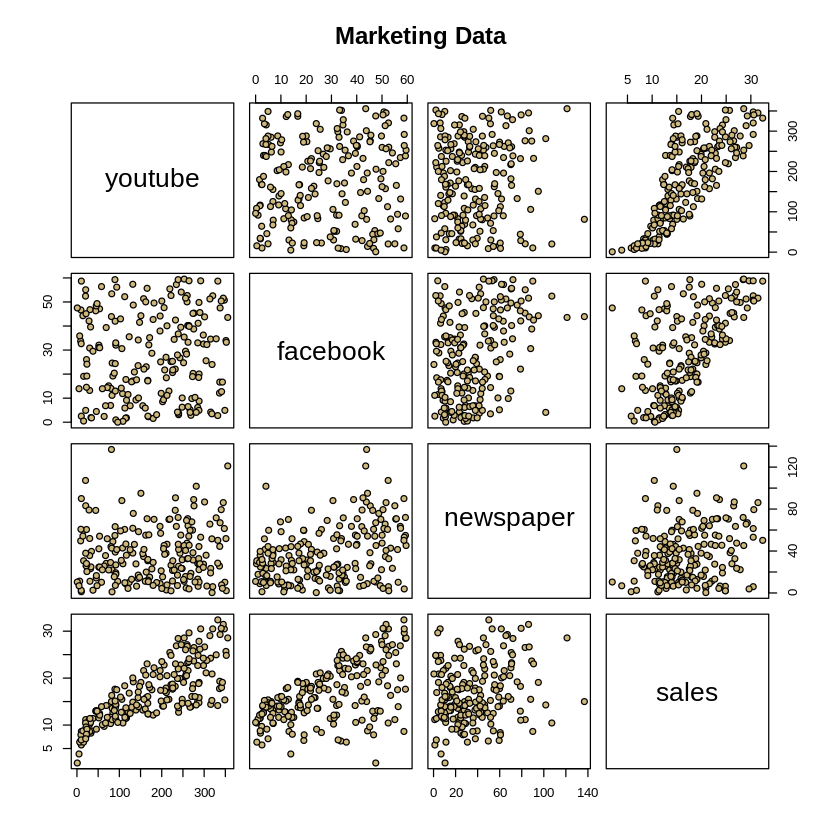

In [39]:
# Load in the data
marketing = read.csv("marketing.txt", sep="")
summary(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [40]:
set.seed(1771) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**1.(a) Working with nonlinearity: Kernel regression**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. For now, let's just focus on the relationship between `sales` and `youtube`, omitting the other variables (future lessons on generalized additive models will allow us to bring back other predictors).

Using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor), and then fit and overlay a kernel regression. Experiment with the bandwidth parameter until the smooth looks appropriate, or comment why no bandwidth is ideal. Justify your answer.

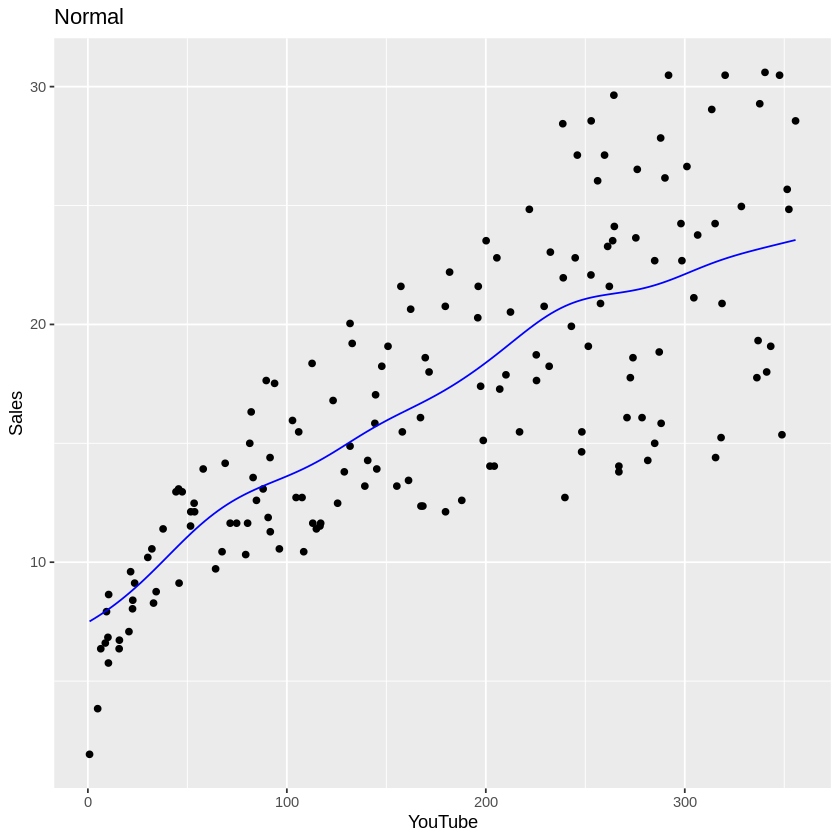

In [41]:
ksmooth_result <- ksmooth(train_marketing$youtube, train_marketing$sales, kernel = "normal", bandwidth = 65)

ksmooth_df <- data.frame(
  youtube = ksmooth_result$x,
  sales = ksmooth_result$y
)

ggplot(train_marketing, aes(x = youtube, y = sales)) +
  geom_point() +
  geom_line(data = ksmooth_df, aes(x = youtube, y = sales), color = "blue") +
  labs(title = "Normal", x = "YouTube", y = "Sales")

they don't look very good - too rough

**1.(b) Working with nonlinearity: Smoothing spline regression**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a smoothing spline regression model. Experiment with the smoothing parameter until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

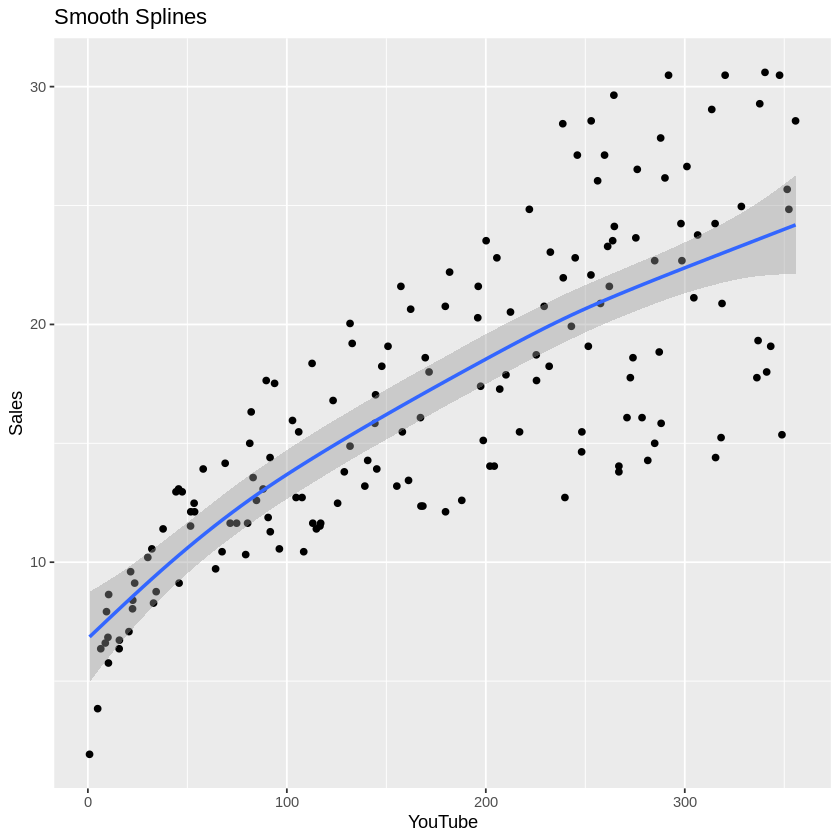

In [42]:
ggplot(train_marketing, aes(x = youtube, y = sales)) +
  geom_point() +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), span = 0.8) +
  labs(title = "Smooth Splines", x = "YouTube", y = "Sales")

this is much smoother and more like I would expect it to be

**1.(c) Working with nonlinearity: Loess**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a loess regression model. You can use the `loess()` function in a similar way as the `lm()` function. Experiment with the smoothing parameter (`span` in the `geom_smooth()` function) until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

`geom_smooth()` using formula 'y ~ x'



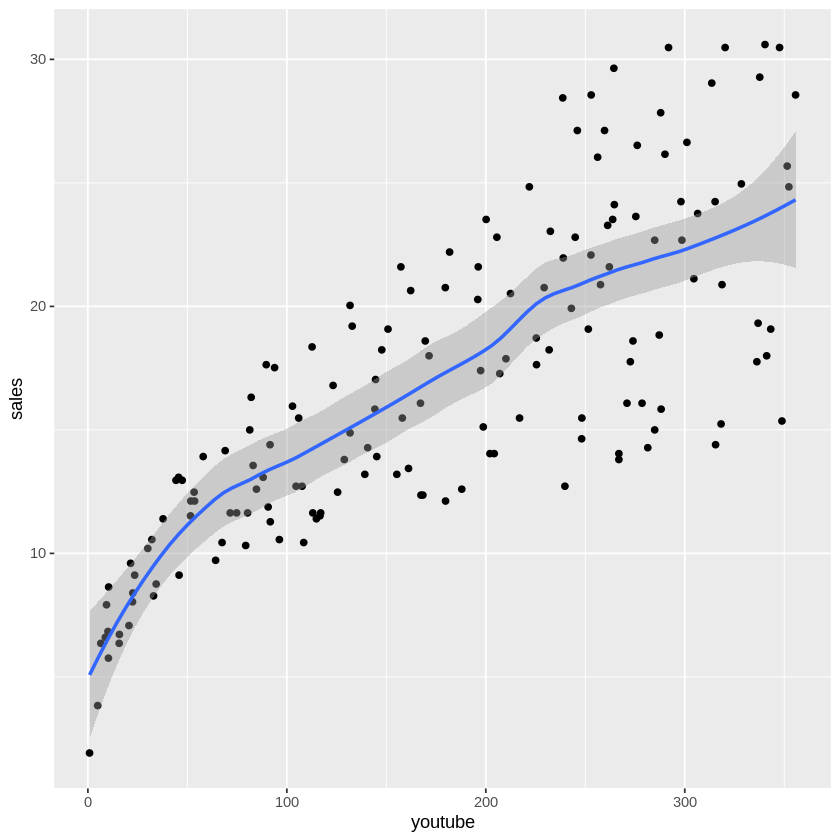

In [43]:
ggplot(train_marketing, aes(x = youtube, y = sales)) +
  geom_point() +
  geom_smooth(method = "loess", span = 0.5)

it continues to match the date more closely

**1.(d) A prediction metric**

Compare the models using the mean squared prediction error (MSPE) on the `test_marketing` dataset. That is, calculate the MSPE for your kernel regression, smoothing spline regression, and loess model, and identify which model is best in terms of this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

\*Note that `ksmooth()` orders your designated `x.points`. Make sure to account for this in your MSPE calculation.

In [44]:
kernal_y <- ksmooth(train_marketing$youtube, train_marketing$sales, kernel = "normal", bandwidth = 40, x.points = test_marketing$youtube)
kernal_mspe <- mean((test_marketing$sales - kernal_y$y)^2)

spline_model <- gam(sales ~ s(youtube, bs = "cr"), data = train_marketing)
spline_y <- predict(spline_model, newdata = test_marketing)
spline_mspe <- mean((test_marketing$sales - spline_y)^2)

loess_model <- loess(sales ~ youtube, data = train_marketing)
loess_y <- predict(loess_model, newdata = test_marketing)
loess_mspe <- mean((test_marketing$sales - loess_y)^2)

kernal_mspe; 'kernal'
spline_mspe; 'spline'
loess_mspe; 'loess'

[1] 64.45882

[1] "kernal"

[1] 17.5393

[1] "spline"

[1] 18.04026

[1] "loess"

spline is the lowest at 17.53

# Problem 2: Simulations!

Simulate data (one predictor and one response) with your own nonlinear relationship. Provide an explanation of how you generated the data. Then answer the questions above (1.(a) - 1.(d)) using your simulated data.

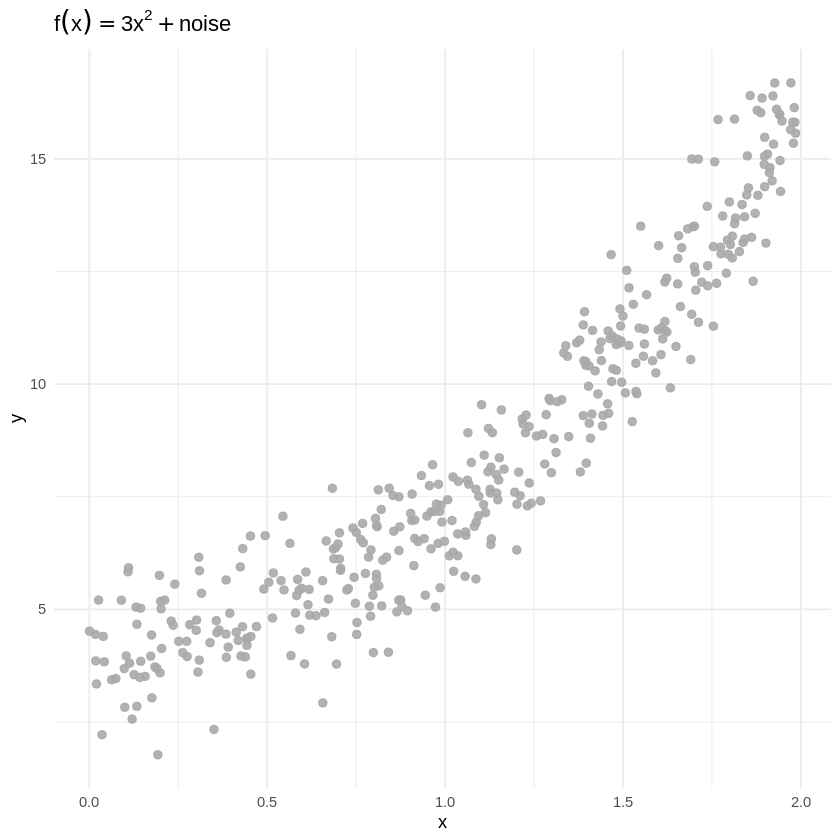

In [45]:
set.seed(1999)

n = 500
x = runif(n, 0, 2)
y = 3 * x^2 + rnorm(n, 0, 1) + 4
d = data.frame(x = x, y = y)

set.seed(12)
n = floor(0.8 * nrow(d))
index = sample(seq_len(nrow(d)), size = n)

training = d[index, ]
testing = d[-index, ]

ggplot(training, aes(x = x, y = y)) +
  geom_point(alpha = 0.9, color = "darkgrey", size = 2) +
  labs(title = expression(f(x) == 3*x^2 + noise), x = "x", y = "y") +
  theme_minimal()

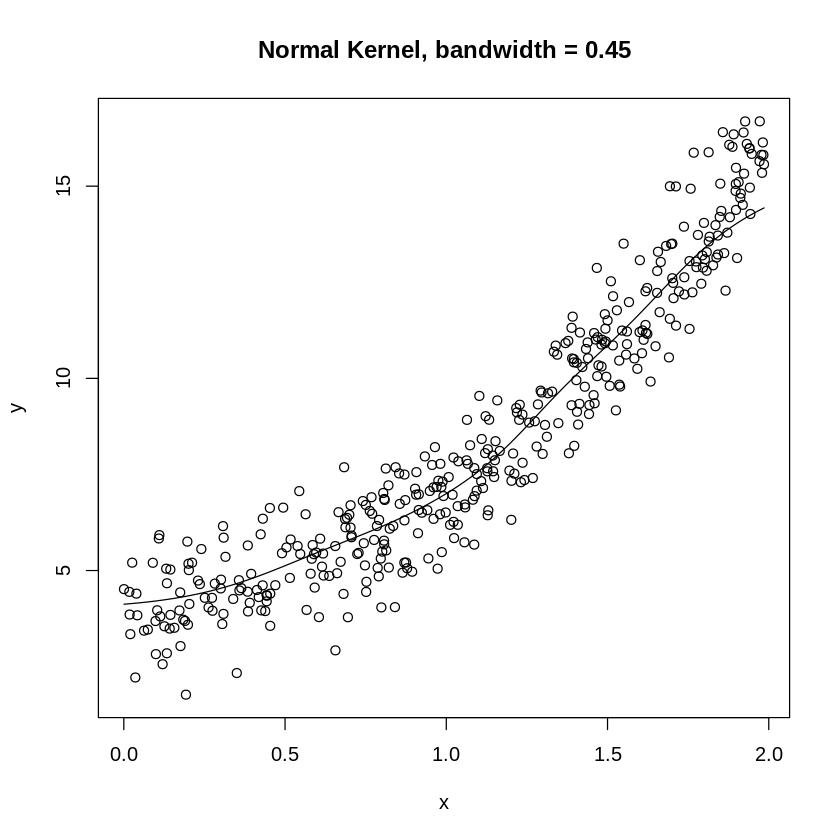

In [46]:
plot(y ~ x, data = training, main = "Normal Kernel, bandwidth = 0.45")
lines(ksmooth(training$x, training$y, kernel = "normal", 0.45))


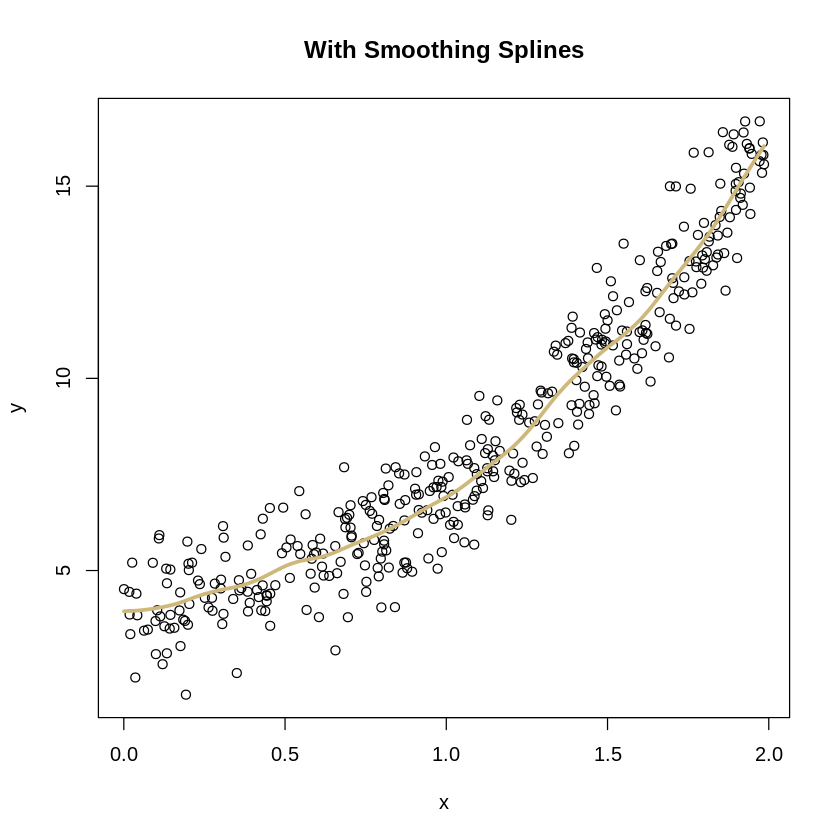

In [47]:
sim.smooth = with(training, smooth.spline(y = y, x = x, spar = 0.75))
plot(y ~ x, data = training, main = "With Smoothing Splines")
lines(sim.smooth, col = "#CFB87C", lwd=3)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



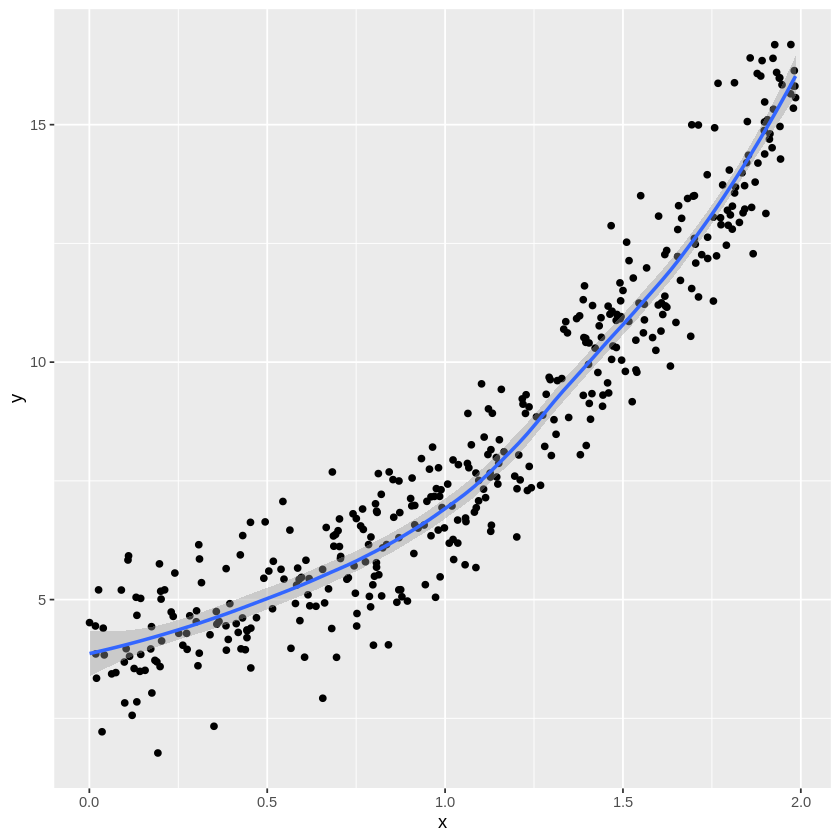

In [48]:
lr = loess(y ~ x, training, span = 0.5) 

ggplot(training, aes(x = x, y = y))+
    geom_point() +
    geom_smooth( span = 0.5)

In [49]:
kernal_y = ksmooth(training$x, training$y, kernel = "normal", 45,x.points = testing$x)
kernal_mspe <- mean((testing$y - yhat_kr$y)^2)

spline_y <- predict(sim.smooth, x = testing$x)
spline_mspe <-mean((testing$y - yhat_ss$y)^2)

loess_y <- predict(lr, newdata = testing$x)
loess_mspe <- mean((testing$y - yhat_loess)^2)

kernal_mspe; 'kernal'
spline_mspe; 'spline'
loess_mspe; 'loess'

[1] 13.40223

[1] "kernal"

[1] 0.9145829

[1] "spline"

[1] 0.9054008

[1] "loess"

loess is now the lowest (pun not intended)